## Import Library

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Import Gambar

In [19]:
image = cv2.imread('nanas.png')

In [20]:
cv2.imshow("Citra Asli", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Mengubah Dari BGR ke HSV

In [17]:
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

## Batasan Warna Kuning Untuk Deteksi Warna

In [5]:
lower_yellow = np.array([0, 50, 100], dtype="uint8")
upper_yellow = np.array([30, 255, 255], dtype="uint8")

## Batasan Warna Hijau Untuk Deteksi Warna

In [6]:
lower_green = np.array([31, 60, 5], dtype="uint8")
upper_green = np.array([150, 255, 255], dtype="uint8")

## Pembuatan Masker untuk Deteksi Buah Nanas dan Daun

In [7]:
mask_pineapple = cv2.inRange(hsv_image, lower_yellow, upper_yellow)
mask_leaves = cv2.inRange(hsv_image, lower_green, upper_green)

## Segmentasi Buah Nanas dan Daun Menggunakan Masker

In [8]:
segmented_pineapple = cv2.bitwise_and(image, image, mask=mask_pineapple)
segmented_leaves = cv2.bitwise_and(image, image, mask=mask_leaves)

## Menghapus Daun dari Masker Nanas

In [9]:
mask_pineapple_no_leaves = cv2.bitwise_not(mask_leaves)
mask_pineapple_no_leaves = cv2.bitwise_and(mask_pineapple, mask_pineapple_no_leaves)

## Menampilkan Hasil Segmentasi

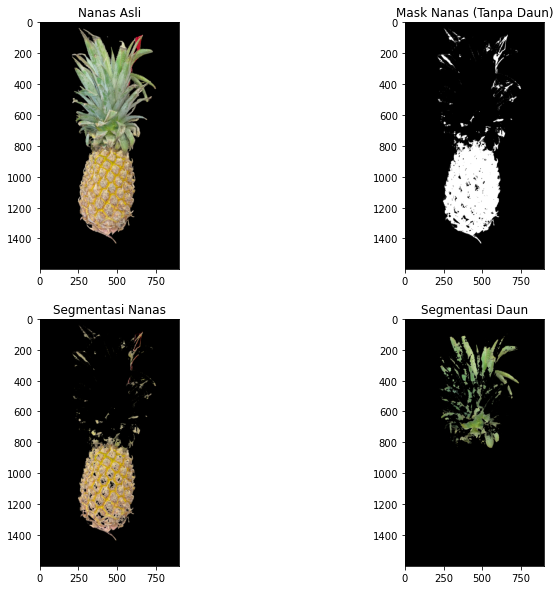

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

axs[0, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[0, 0].set_title('Nanas Asli')

axs[0, 1].imshow(mask_pineapple_no_leaves, cmap='gray')
axs[0, 1].set_title('Mask Nanas (Tanpa Daun)')

axs[1, 0].imshow(cv2.cvtColor(segmented_pineapple, cv2.COLOR_BGR2RGB))
axs[1, 0].set_title('Segmentasi Nanas')

axs[1, 1].imshow(cv2.cvtColor(segmented_leaves, cv2.COLOR_BGR2RGB))
axs[1, 1].set_title('Segmentasi Daun')

plt.show()